In [3]:
import pandas as pd
import numpy as np
import re #used as a regular expression to find particular patterns and process it
import string #used to obtain information in the string and manipulate the string overall
import warnings
import re
%pip install WordCloud
from wordcloud import WordCloud
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 3.5 MB/s eta 0:00:005.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessandrogagarin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
DATASET_COLUMNS=['target','ids','date','query','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('training.1600000.processed.noemoticon.csv', \
                 encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head(5)

,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df['target'] = df['target'].replace(4,1)

In [7]:
data=df[['text','target']]
data.head(2)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0


In [8]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

data_pos = data_pos.iloc[:int(25000)]
data_neg = data_neg.iloc[:int(25000)]

dataset = pd.concat([data_pos, data_neg])

print(len(dataset))
dataset.head(2)

50000


,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1


In [9]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

24995    is sad that it is raining... no softball for m...
24996                               last day of vacation. 
24997    good morning! its a beautiful day, too bad i'm...
24998    night all. love yas. hahahahahah btw... vodka ...
24999       why do i have to go back to school tomorrow?? 
Name: text, dtype: object

In [10]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [12]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

24995                   sad raining... no softball today!!
24996                                   last day vacation.
24997    good morning! beautiful day, bad i'm gonna spe...
24998    night all. love yas. hahahahahah btw... vodka ...
24999                            go back school tomorrow??
Name: text, dtype: object

In [13]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'wouldn', 'wasn', 'so', 've', 'who', 'while', 'in', "isn't", 'as', 'hasn', 'mustn', 'mightn', 'at', "wouldn't", 'had', 'and', 'y', 'most', 'all', 'our', 'why', 's', 'yourself', 'now', 'which', "wasn't", 'own', 'down', 'into', 'more', 'not', 'through', 'her', 'above', 'against', "weren't", 'weren', 'your', "it's", 'such', 'whom', "you'll", 'be', 'didn', 'll', 'out', 'just', 'during', "mightn't", 'isn', "won't", 'the', 'he', 'until', 'both', 'd', 'been', 'myself', 'on', 'an', 'his', "that'll", 'by', 'needn', 'any', 'herself', "shouldn't", 'because', 'when', 'very', 'before', 'if', 'to', 'shan', 'him', 'hers', "haven't", 'below', 'few', 't', "couldn't", 'them', 'are', 'do', 'me', 'off', 'himself', 'ain', 'no', 'about', "doesn't", 'yours', 'each', "needn't", "didn't", 'their', 'we', "you've", 'than', 'can', 'for', 'its', 'shouldn', 'itself', 'a', 'nor', 'i', "you'd", 'were', 'once', 'again', "hasn't", 'ma', 'theirs', "mustn't", 'they', 'themselves', 'these', "she's"

In [14]:
dataset['text']=dataset['text'].apply(remove_stopwords)
dataset['text'].tail()

24995                   sad raining ... softball today ! !
24996                                  last day vacation .
24997    good morning ! beautiful day , bad ' gonna spe...
24998    night all. love yas. hahahahahah btw ... vodka...
24999                           go back school tomorrow? ?
Name: text, dtype: object

In [15]:
# removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000              love @health4uandpets u guys r best ! !
800001    im meeting one besties tonight ! cant wait ! !...
800002    @darealsunisakim thanks twitter add , sunisa !...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [16]:
# removing numbers 

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000               love @healthuandpets u guys r best ! !
800001    im meeting one besties tonight ! cant wait ! !...
800002    @darealsunisakim thanks twitter add , sunisa !...
800003    sick really cheap hurts much eat real food plu...
800004                       @lovesbrooklyn effect everyone
Name: text, dtype: object

In [17]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [18]:
dataset['text'] = np.vectorize(remove_pattern)(dataset['text'], "@[\w]*")
dataset.head()

,text,target
800000,love u guys r best ! !,1
800001,im meeting one besties tonight ! cant wait ! !...,1
800002,"thanks twitter add , sunisa ! got meet hin sh...",1
800003,sick really cheap hurts much eat real food plu...,1
800004,effect everyone,1


In [19]:
dataset['text'] = dataset['text'].str.replace("[^a-zA-Z#]", " ")
dataset.head()

,text,target
800000,love u guys r best,1
800001,im meeting one besties tonight cant wait ...,1
800002,thanks twitter add sunisa got meet hin sh...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,effect everyone,1


In [20]:
dataset['text'] = dataset['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
dataset.head()

,text,target
800000,love guys best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurts much real food plus fr...,1
800004,effect everyone,1


In [21]:
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000                                   [love, guys, best]
800001    [meeting, besties, tonight, cant, wait, girl, ...
800002    [thanks, twitter, sunisa, meet, show, area, sw...
800003    [sick, really, cheap, hurts, much, real, food,...
800004                                   [effect, everyone]
Name: text, dtype: object

In [22]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                                   [love, guys, best]
800001    [meeting, besties, tonight, cant, wait, girl, ...
800002    [thanks, twitter, sunisa, meet, show, area, sw...
800003    [sick, really, cheap, hurts, much, real, food,...
800004                                   [effect, everyone]
Name: text, dtype: object

In [23]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alessandrogagarin/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alessandrogagarin/nltk_data...


,text,target
800000,love guy best,1
800001,meeting besties tonight cant wait girl talk,1
800002,thanks twitter sunisa meet show area sweetheart,1
800003,sick really cheap hurt much real food plus fri...,1
800004,effect everyone,1


In [24]:
X = dataset.text
y = dataset.target

In [32]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=1000, stop_words='english')

tfidf.fit(list(X_train) + list(X_val))
X_train_tfidf = tfidf.transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
count_vec.fit(list(X_train) + list(X_val))

X_train_count_vec = count_vec.transform(X_train)
X_val_count_vec = count_vec.transform(X_val)

In [35]:
scores_dict_tfid = {}

In [36]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred_nb, y_val))

naive bayes tfidf accuracy 0.556


In [37]:
scores_dict_tfid['Multinomial Naive Bayes(Tfid)'] = accuracy_score(y_pred_nb, y_val)

<AxesSubplot:>

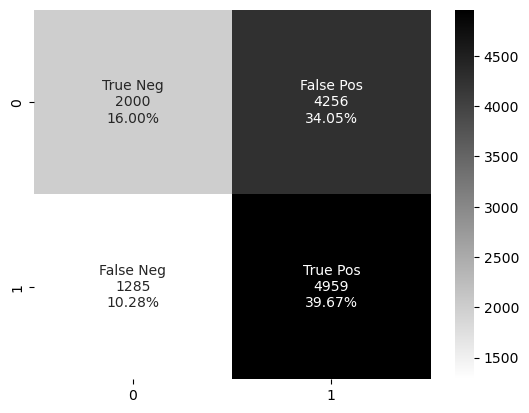

In [31]:
cf_matrix_model = confusion_matrix(y_val, y_pred_nb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_model.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_model.flatten()/np.sum(cf_matrix_model)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_model, annot=labels, fmt='', cmap='binary')

In [38]:
import pickle
filename = "model.pkl"

In [40]:
with open(filename, 'wb') as file:
      pickle.dump(nb, file)